In [1]:
from psycopg2 import connect
import configparser
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker

CONFIG = configparser.ConfigParser()
CONFIG.read('db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

from IPython.display import HTML

def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

# Traffic Volumes - Turning Movement Counts (TMCs) Short Term
# Identifying Extreme Values 

## Visualize the data

In [2]:
sql_volumes = '''
SELECT volume_15min
FROM open_data.volumes_tmc_shortterm
'''
volumes = pandasql.read_sql(sql_volumes, con)

(0, 1500)

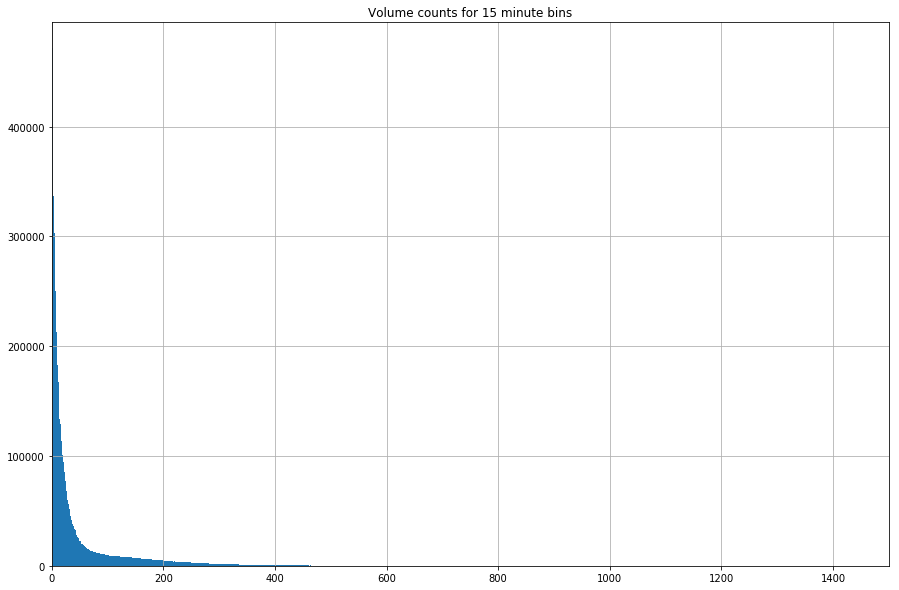

In [3]:
bin_val = np.arange(min(volumes['volume_15min']), max(volumes['volume_15min']), 1)

volumes.hist(bins=bin_val, figsize=(15,10))
plt.title('Volume counts for 15 minute bins')
plt.rc('font', size=10)          
plt.rc('axes', titlesize=15)
plt.xlim(0, 1500)

In [4]:
max(volumes['volume_15min'])

13218

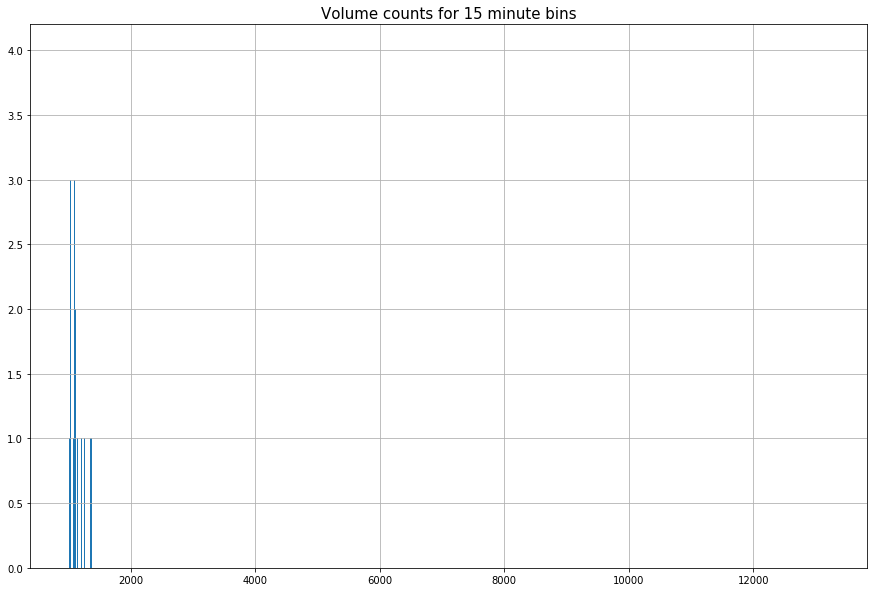

In [5]:
# look at large values ... i.e. volumes more than 1000

bin_val = np.arange(1000, max(volumes['volume_15min']), 1)

volumes.hist(bins=bin_val, figsize=(15,10))
plt.title('Volume counts for 15 minute bins')
plt.rc('font', size=10)          
plt.rc('axes', titlesize=15)

In [6]:
check_1000 = '''
SELECT * 
FROM open_data.volumes_tmc_shortterm
WHERE volume_15min > 1000
'''
pandasql.read_sql(check_1000, con)

,int_id,px,location,class_type,leg,movement,datetime_bin,volume_15min
0,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,1998-01-19 08:00:00,1084
1,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,1998-01-19 08:15:00,1114
2,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,1998-01-19 08:30:00,1102
3,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,1998-01-19 08:45:00,1067
4,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,2003-12-17 07:45:00,1003
5,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,2003-12-17 08:00:00,1058
6,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,2003-12-17 08:15:00,1073
7,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,2003-12-17 08:30:00,1061
8,13469154,1344,BRITISH COLUMBIA RD AT LAKE SHORE BLVD (PX 1344),Vehicles,W,Through,2003-12-17 08:45:00,1017
9,13469216,930,LAKE SHORE BLVD AT ONTARIO DR & REMEMBRANCE DR...,Vehicles,W,Through,1995-03-02 07:45:00,1022


## Conclusion 

The maximum value in this dataset is a volume of 13218, and there are very few volumes in general over 1000. Values this high are normal as discovered when analysing the TMC permanent dataset. Also, the volume values and their counts decrease gradually as the volume increases, so these high values are not random. An IQR test would pull some outliers, but since we can verify that none of the values in the dataset are extreme, the test is not necessary in this case. 